In [1]:
# Standard imports
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
! pip install kaggle #installing kaggle

In [3]:
! mkdir ~/.kaggle #making directory

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 99% 657M/663M [00:08<00:00, 56.0MB/s]
100% 663M/663M [00:08<00:00, 78.2MB/s]


In [7]:
! ls

kaggle.json  sample_data  tuberculosis-tb-chest-xray-dataset.zip


In [8]:
! unzip tuberculosis-tb-chest-xray-dataset.zip #unzipping files

Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

In [9]:
import pandas as pd
import os


filenames = os.listdir("TB_Chest_Radiography_Database/Normal")
categories = []
for filename in filenames:
  categories.append(0)

df1 = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Note: this randomizes the filenames

In [10]:
df1.head(5)

filename  category
0  Normal-2051.png         0
1  Normal-2321.png         0
2  Normal-1551.png         0
3  Normal-1557.png         0
4  Normal-2484.png         0

In [11]:
len(df1)

3500

In [12]:
categories2=[]
filenames2 = os.listdir("TB_Chest_Radiography_Database/Tuberculosis") # TB images categorized as 1
for filename in filenames2:
  categories2.append(1)

df2 = pd.DataFrame({
    'filename': filenames2,
    'category': categories2
})

In [13]:
df2.head(5)

filename  category
0  Tuberculosis-197.png         1
1   Tuberculosis-17.png         1
2   Tuberculosis-70.png         1
3  Tuberculosis-376.png         1
4  Tuberculosis-373.png         1

In [14]:
len(df2)

700

In [15]:
# Adding the two dataframes along rows
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [16]:
df.head(5)

filename  category
0  Normal-2051.png         0
1  Normal-2321.png         0
2  Normal-1551.png         0
3  Normal-1557.png         0
4  Normal-2484.png         0

In [17]:
len(df)

4200

In [18]:
df['filename']

0            Normal-2051.png
1            Normal-2321.png
2            Normal-1551.png
3            Normal-1557.png
4            Normal-2484.png
                ...         
4195    Tuberculosis-259.png
4196    Tuberculosis-527.png
4197    Tuberculosis-206.png
4198    Tuberculosis-333.png
4199    Tuberculosis-291.png
Name: filename, Length: 4200, dtype: object

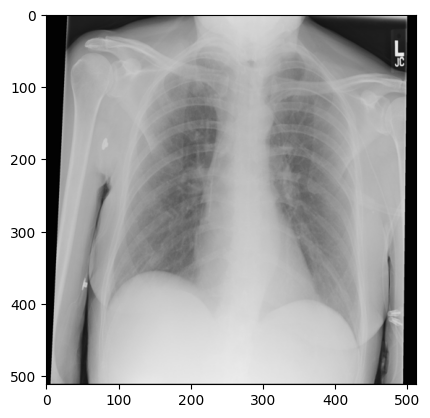

In [19]:
#showing a sample image of normal chest xray
# >=3500 = tuberculosis, <=3500=normal images
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('TB_Chest_Radiography_Database/Normal/'+df['filename'][1700], cv2.IMREAD_COLOR)
plt.imshow(img)

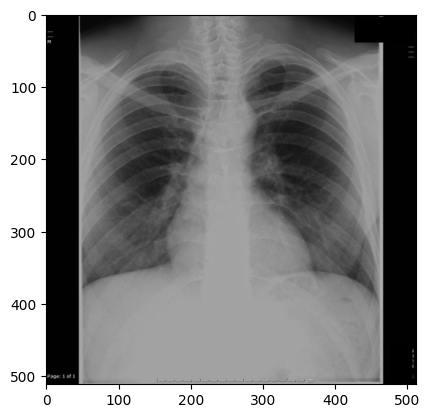

In [20]:
#showing a sample image of tuberculosis chest xray
# >=3500 = tuberculosis, <=3500=normal images
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('TB_Chest_Radiography_Database/Tuberculosis/'+df['filename'][3700], cv2.IMREAD_COLOR)
plt.imshow(img)

In [21]:
# Resizing images and storing in X numpy array
import numpy as np
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((4200,80,80,3)) # 4200 images, 80x80 pixels, 3 channels (RGB)
i=0
for image_file in df1['filename']:
    X[i,:] = resize_img('TB_Chest_Radiography_Database/Normal/'+image_file)
    i+=1
for image_file in df2['filename']:
    X[i,:] = resize_img('TB_Chest_Radiography_Database/Tuberculosis/'+image_file)
    i+=1

In [22]:
X.shape

(4200, 80, 80, 3)

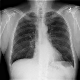

In [23]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[2])

In [24]:
from sklearn.model_selection import train_test_split

# Training, validation, and testing datasets sizes
#train_size = 15000
#validation_size = 5000
#test_size = 5000

# Splitting the data into training and remaining sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, df['category'], test_size=0.3, random_state=42, stratify=df['category'])

# Splitting the remaining into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, stratify=y_remaining)

# Checking the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2940, 80, 80, 3)
y_train shape: (2940,)
X_validation shape: (630, 80, 80, 3)
y_validation shape: (630,)
X_test shape: (630, 80, 80, 3)
y_test shape: (630,)


In [25]:
type(y_test)

pandas.core.series.Series

In [26]:
value_counts = y_test.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    525
1    105
Name: category, dtype: int64
Count of 0: 525
Count of 1: 105


In [27]:
value_counts = y_validation.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    525
1    105
Name: category, dtype: int64
Count of 0: 525
Count of 1: 105


In [28]:
value_counts = y_train.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    2450
1     490
Name: category, dtype: int64
Count of 0: 2450
Count of 1: 490


Xception

In [29]:
X_train.shape

(2940, 80, 80, 3)

In [30]:
# Resize after preprocessing to keep full dataset
X_train_X = tf.image.resize(X_train, [71,71])
X_valid_X = tf.image.resize(X_validation, [71,71])
X_test_X = tf.image.resize(X_test, [71,71])

In [31]:
X_train_X.shape

TensorShape([2940, 71, 71, 3])

In [32]:
# Try Xception
# Data augmentation, global pooling and dropout
base_model_2X = keras.applications.Xception(weights="imagenet",
                                              include_top=False,
                                         input_shape=(71,71,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model_2X.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(1, activation="sigmoid")(dropout)
model_2X = keras.models.Model(inputs=base_model_2X.input, outputs=output)

83683744/83683744 [==============================] - 1s 0us/step


In [33]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, brightness_range=[0.8, 1.2])

In [34]:
# Freeze transferred layers and train
%%time
for layer in base_model_2X.layers:
    layer.trainable = False

model_2X.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-3),
                metrics=["accuracy"])

history_2X = model_2X.fit(datagen.flow(X_train_X, y_train, batch_size=32),
                    epochs=50, validation_data=(X_valid_X, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])


Epoch 1/50
92/92 [==============================] - 22s 114ms/step - loss: 0.8612 - accuracy: 0.8299 - val_loss: 0.4780 - val_accuracy: 0.9000
Epoch 2/50
92/92 [==============================] - 13s 142ms/step - loss: 0.4732 - accuracy: 0.8925 - val_loss: 0.4067 - val_accuracy: 0.8984
Epoch 3/50
92/92 [==============================] - 8s 91ms/step - loss: 0.4405 - accuracy: 0.9027 - val_loss: 0.3752 - val_accuracy: 0.9063
Epoch 4/50
92/92 [==============================] - 7s 72ms/step - loss: 0.3573 - accuracy: 0.9146 - val_loss: 0.3349 - val_accuracy: 0.9302
Epoch 5/50
92/92 [==============================] - 10s 113ms/step - loss: 0.3598 - accuracy: 0.9167 - val_loss: 0.2719 - val_accuracy: 0.9286
Epoch 6/50
92/92 [==============================] - 7s 75ms/step - loss: 0.3161 - accuracy: 0.9150 - val_loss: 0.3090 - val_accuracy: 0.9333
Epoch 7/50
92/92 [==============================] - 9s 96ms/step - loss: 0.2816 - accuracy: 0.9235 - val_loss: 0.2642 - val_accuracy: 0.9333
Epoch 8

In [35]:
# Unfreeze layers and train
%%time
for layer in base_model_2X.layers:
    layer.trainable = True

model_2X.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
                metrics=["accuracy"])

n_epochs = 100
batch_size = 32
history_2X = model_2X.fit(datagen.flow(X_train_X, y_train, batch_size=batch_size),
                    epochs=n_epochs,
                    validation_data=(X_valid_X, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/100
92/92 [==============================] - 58s 135ms/step - loss: 0.2229 - accuracy: 0.9102 - val_loss: 0.2295 - val_accuracy: 0.9127
Epoch 2/100
92/92 [==============================] - 10s 111ms/step - loss: 0.0707 - accuracy: 0.9806 - val_loss: 0.2509 - val_accuracy: 0.9587
Epoch 3/100
92/92 [==============================] - 11s 120ms/step - loss: 0.0363 - accuracy: 0.9901 - val_loss: 0.4688 - val_accuracy: 0.9825
Epoch 4/100
92/92 [==============================] - 11s 122ms/step - loss: 0.0225 - accuracy: 0.9935 - val_loss: 0.0441 - val_accuracy: 0.9905
Epoch 5/100
92/92 [==============================] - 10s 110ms/step - loss: 0.0238 - accuracy: 0.9908 - val_loss: 0.9004 - val_accuracy: 0.9825
Epoch 6/100
92/92 [==============================] - 11s 117ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 2.1657 - val_accuracy: 0.9841
Epoch 7/100
92/92 [==============================] - 11s 121ms/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 0.7529 - val_accuracy:

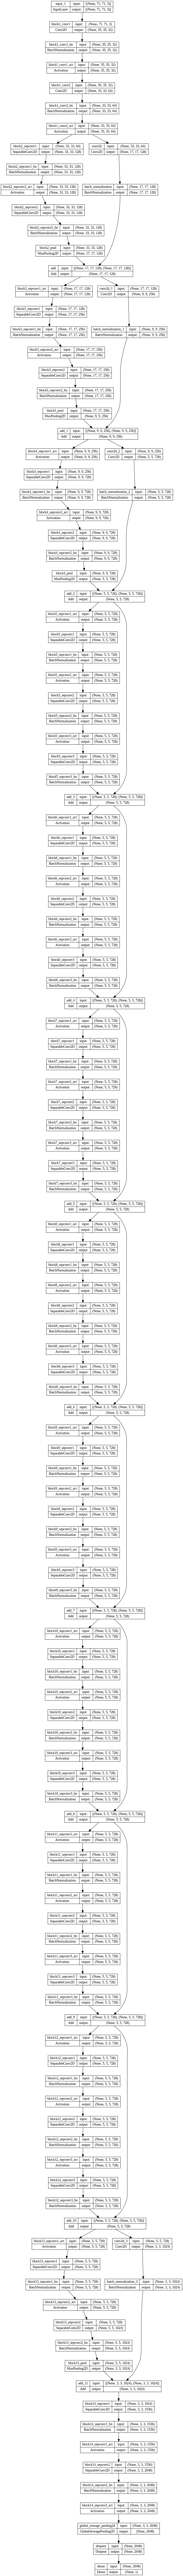

In [36]:
keras.utils.plot_model(model_2X, show_shapes=True)

In [37]:
# Printing validation set accuracy
val_loss, val_accuracy = model_2X.evaluate(X_validation, y_validation)
print(f"Validation Accuracy: {val_accuracy:.4f}")

20/20 [==============================] - 2s 40ms/step - loss: 0.0536 - accuracy: 0.9841
Validation Accuracy: 0.9841


In [38]:
# Printing test set accuracy
model_2X.evaluate(X_test, y_test)

20/20 [==============================] - 0s 24ms/step - loss: 0.0242 - accuracy: 0.9873


[0.024226326495409012, 0.9873015880584717]

In [39]:
# Save accuracy and validation accuracy for each epoch
accuracy_values_2X = history_2X.history["accuracy"]
val_accuracy_values_2X = history_2X.history["val_accuracy"]

In [40]:
from skimage.transform import resize

# Assuming X_test contains images
resized_X_test = np.array([resize(image, (71, 71, 3)) for image in X_test])

# Predict on the resized test set
y_pred = model_2X.predict(resized_X_test)


20/20 [==============================] - 2s 26ms/step


Overall Accuracy: 0.9905
Precision: 0.9714
Recall: 0.9714
F1 Score: 0.9714


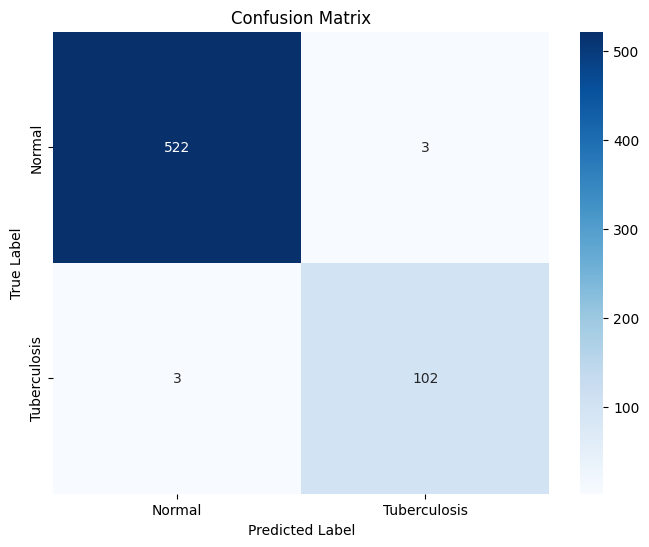

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
#y_pred = model_2X.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Flatten arrays for evaluation
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred_binary)

# Accuracy
accuracy = accuracy_score(y_test_flat, y_pred_flat)
print(f"Overall Accuracy: {accuracy:.4f}")

# Precision, Recall, F1 Score
precision = precision_score(y_test_flat, y_pred_flat)
recall = recall_score(y_test_flat, y_pred_flat)
f1 = f1_score(y_test_flat, y_pred_flat)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [42]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)

# Compute accuracy for each class
class_accuracies = []
for i in range(conf_matrix.shape[0]):
    class_accuracy = conf_matrix[i, i] / sum(conf_matrix[i, :])
    class_accuracies.append(class_accuracy)

# Display accuracies
print(f"Accuracy for Class 0 (Normal): {class_accuracies[0]:.4f}")
print(f"Accuracy for Class 1 (Tuberculosis): {class_accuracies[1]:.4f}")


Accuracy for Class 0 (Normal): 0.9943
Accuracy for Class 1 (Tuberculosis): 0.9714
